In [1]:
### Figure 3C for the PERISCOPE manuscript. ###
### Script by Meraj Ramezani(mramezan@broadinstitute.org) ###
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import permutations
import matplotlib.font_manager as font_manager


%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [2]:
# Import the Hela HPLM gene level profiles & hits from the hit calling process then subset the gene level profiles for all hits 
df = pd.read_csv('../20210422_6W_CP257_guide_normalized_feature_select_median_merged_ALLBATCHES___HPLM___ALLWELLS_gene_aggregated.csv.gz').set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
comp_spef_hits = pd.read_csv('../Fig3_A_B/cp257_hplm_plate_level_median_per_feat_sig_genes_5_fdr_compartment_specific_hits.csv').rename(columns={'Unnamed: 0':'Gene'}).set_index('Gene')
whole_cell_hits = pd.read_csv('../Fig3_A_B/cp257_hplm_plate_level_median_per_feat_sig_genes_5_fdr_whole_cell_hits.csv').rename(columns={'Unnamed: 0':'Gene'}).set_index('Gene')
hit_list = list(comp_spef_hits.index) + list(whole_cell_hits.index)
df_hits = df.loc[hit_list]
df_hits

,Cells_AreaShape_CentralMoment_0_3,Cells_AreaShape_CentralMoment_1_0,Cells_AreaShape_CentralMoment_1_2,Cells_AreaShape_CentralMoment_1_3,Cells_AreaShape_CentralMoment_2_1,Cells_AreaShape_CentralMoment_2_3,Cells_AreaShape_Compactness,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_HuMoment_1,...,Nuclei_Texture_SumVariance_Mito_10_03_256,Nuclei_Texture_SumVariance_Phalloidin_10_01_256,Nuclei_Texture_SumVariance_Phalloidin_10_02_256,Nuclei_Texture_SumVariance_Phalloidin_10_03_256,Nuclei_Texture_SumVariance_WGA_10_00_256,Nuclei_Texture_SumVariance_WGA_10_01_256,Nuclei_Texture_SumVariance_WGA_10_02_256,Nuclei_Texture_SumVariance_WGA_10_03_256,Nuclei_Texture_SumVariance_WGA_5_03_256,Nuclei_Texture_Variance_DAPI_Painting_10_03_256
Metadata_Foci_Barcode_MatchedTo_GeneCode,,,,,,,,,,,,,,,,,,,,,
ABCA12,0.046641,0.003716,0.029627,-0.001628,-0.050088,-0.001151,-0.120196,0.106839,0.028537,-0.083236,...,-0.002190,-0.097184,-0.172442,-0.152118,-0.074674,-0.011332,-0.085357,-0.069697,-0.131412,-0.180772
ABCB4,0.012981,-0.065788,-0.010279,-0.003576,0.008386,0.000279,-0.082302,0.110517,-0.033144,-0.037297,...,0.001077,-0.095521,-0.083826,-0.046140,-0.187211,-0.105152,-0.093550,0.027690,-0.025057,0.046747
ABCB5,0.008738,0.068559,0.005944,0.007269,0.008624,0.003714,-0.127265,0.092426,0.095370,0.110191,...,-0.109685,0.015813,-0.017631,-0.029420,0.076869,0.224691,0.003504,0.026630,0.111763,0.090989
ABCC4,0.003547,-0.117888,-0.007878,-0.002300,-0.006497,-0.000706,0.058559,0.014142,-0.199852,-0.056698,...,-0.052490,-0.070139,-0.087233,-0.065748,-0.181227,-0.287680,-0.363040,-0.379078,-0.236850,-0.035882
ABCF2,0.022766,0.174755,-0.014021,0.001288,0.072661,0.002041,-0.622196,0.574030,0.657998,-0.108905,...,-0.082098,-0.205022,-0.132027,-0.209065,-0.349670,-0.251723,-0.204657,-0.402130,-0.161090,-0.187340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSWIM6,0.020354,0.004532,-0.033463,0.009186,-0.011431,-0.000901,0.135814,-0.236402,-0.281332,-0.114684,...,-0.106403,-0.117882,-0.090810,-0.113893,-0.205126,-0.357806,-0.144143,-0.202656,-0.091221,-0.560790
ZSWIM7,0.002570,-0.119427,0.004040,-0.005746,-0.015322,0.001861,-0.138967,-0.006796,0.045777,-0.249543,...,-0.197540,-0.073032,-0.016957,-0.048796,-0.336193,-0.364650,-0.378735,-0.294673,-0.381242,-0.510563
ZSWIM8,-0.013826,0.228313,0.024481,-0.002546,0.020577,0.000311,-0.081970,0.100603,0.069663,-0.169832,...,0.028297,-0.132432,-0.151381,-0.129630,0.071587,-0.034877,-0.105099,0.387505,0.076288,0.132016


In [3]:
# Calculate correlation between all gene pairs and create a dictionory of gene pairs/correlation
df_hits_corr = df_hits.T.corr()
genes = list(df_hits_corr.index)
corr_dic = {}
for gene1 in genes:
    for gene2 in genes:
        if len(frozenset([gene1,gene2])) == 1 :
            continue
        else:    
            corr_dic[frozenset([gene1,gene2])]=(df_hits_corr.loc[gene1,gene2])
        
print(len(corr_dic))

11047350


In [4]:
# Input the protein clusters from the CORUM3.0 database and subset the human clusters
ppi_data = pd.read_csv('../Input_files/allComplexes 2.txt',sep = '\t')
ppi_data_h = ppi_data[ppi_data['Organism'] == "Human"]
ppi_data_h

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,subunits(Gene name),Subunits comment,PubMed ID,Complex comment,Disease comment,SWISSPROT organism,subunits(Gene name syn),subunits(Protein name)
0,1,BCL6-HDAC4 complex,Human,None,None,P41182;P56524,604;9759,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,DNA topological change;negative regulation of ...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC4,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;KIAA0288,B-cell lymphoma 6 protein;Histone deacetylase 4
1,2,BCL6-HDAC5 complex,Human,None,None,P41182;Q9UQL6,604;10014,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,DNA topological change;negative regulation of ...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC5,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;KIAA0600,B-cell lymphoma 6 protein;Histone deacetylase 5
2,3,BCL6-HDAC7 complex,Human,None,None,P41182;Q8WUI4,604;51564,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,DNA topological change;negative regulation of ...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC7,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;HDAC7A,B-cell lymphoma 6 protein;Histone deacetylase 7
3,4,Multisubunit ACTR coactivator complex,Human,None,None,Q09472;Q92793;Q92831;Q9Y6Q9,2033;1387;8850;8202,MI:0004-affinity chromatography technologies;M...,GO:0045893;GO:0023052;GO:0005634,"positive regulation of transcription, DNA-temp...",11.02.03.04.01;30.01;70.10,transcription activation;cellular signalling;n...,EP300;CREBBP;KAT2B;NCOA3,None,9267036,Cofactor ACTR binds directly nuclear receptors...,None,Homo sapiens (Human);Homo sapiens (Human);Homo...,"P300;CBP;PCAF;AIB1, BHLHE42, RAC3, TRAM1, ACTR",Histone acetyltransferase p300;CREB-binding pr...
5,10,Condensin I complex,Human,13S condensin complex,None,O95347;Q15003;Q15021;Q9BPX3;Q9NTJ3,10592;23397;9918;64151;10051,MI:0004-affinity chromatography technologies;M...,GO:0000279;GO:0007067;GO:0030261;GO:0007059;GO...,M phase;mitotic nuclear division;chromosome co...,10.03.01.01.11;10.03.04.03;10.03.04.05;42.10.0...,M phase;chromosome condensation;chromosome seg...,SMC2;NCAPH;NCAPD2;NCAPG;SMC4,None,11136719,None,None,Homo sapiens (Human);Homo sapiens (Human);Homo...,CAPE SMC2L1;BRRN BRRN1 CAPH KIAA0074;CAPD2 CNA...,Structural maintenance of chromosomes protein ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,7586,FOXO1-ESR1 complex,Human,FKHR-ESRA complex,human hepatocyte carcinoma HepG2 cells; MCF-7 ...,P03372;Q12778,2099;2308,MI:0096-pull down;MI:0018-two hybrid,GO:0035257;GO:0030331,nuclear hormone receptor binding;estrogen rece...,None,None,ESR1;FOXO1,None,11353774,FKHR interacts with ERalpha in an E2-dependent...,None,Homo sapiens (Human);Homo sapiens (Human),"ESRA, NR3A1;FKHR, FOXO1A",Estrogen receptor;Forkhead box protein O1
4268,7587,APP(AICD)-FOXO3 complex,Human,APP(AICD)-FOXO3a complex,HEK 293T cells; SY-SH5Y cells,O43524;P05067,2309;351,MI:0019-coimmunoprecipitation,GO:0005737;GO:0008219;GO:0006979;GO:0005634;GO...,cytoplasm;cell death;response to oxidative str...,70.03;40.10;32.01.01;70.10;40.10.02,cytoplasm;cell death;oxidative stress response...,FOXO3;APP,AICD is a small APP intracellular domain.,24832605,"In human cells, AICD physically interacts with...",None,Homo sapiens (Human);Homo sapiens (Human),"FKHRL1, FOXO3A;

In [5]:
# Create a list of protein clusters with all complexes that had at least 66% of genes represented within the Hela HPLM WGS hits
cluster_count = 0
hit_cluster_list_list = []
hit_set = set()
for i in range(len(ppi_data_h)):
    cluster = ppi_data_h.iloc[i]['subunits(Gene name)'].split(';')
    count = 0
    hit_cluster_list = []
    for g in cluster:
        if g in genes:
            count += 1
            hit_set.add(g)
            hit_cluster_list.append(g)
    if (count/len(cluster)) >= 0.66:
        cluster_count += 1
    if hit_cluster_list and (count/len(cluster)) >= 0.66:
        hit_cluster_list_list.append(hit_cluster_list)
print(len(hit_set),cluster_count,len(hit_cluster_list_list))

1416 704 704


In [6]:
# Assign correlations to hit gene pairs
hit_pair_set = set()
for l in hit_cluster_list_list:
    for c in list(permutations(l,2)):
        hit_pair_set.add(frozenset(c))

hit_corr_dic = {}
for s in hit_pair_set:
    hit_corr_dic[s] = corr_dic[s]

print(' Number of hit pairs',len(hit_pair_set),'\n',
      'Number of hit pairs with correlation',len(hit_corr_dic))

 Number of hit pairs 3518 
 Number of hit pairs with correlation 3518


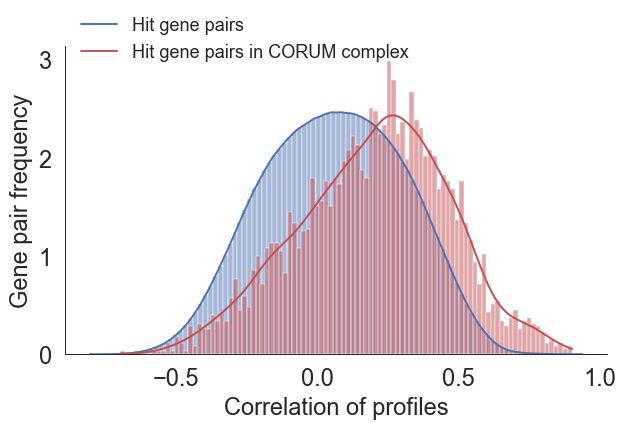

In [7]:
# Plot CORUM gene pair correlation distribution for Fig 3C
sns.set_theme(style="white",rc = {'axes.linewidth': 0.7,'xtick.labelsize':17,'ytick.labelsize':17})


fig, ax = plt.subplots(figsize=(7,4))

all_corr = list(corr_dic.values())
cluster_corr = list(hit_corr_dic.values())

sns.histplot(all_corr ,color='b' ,stat= 'percent' ,bins= 100, kde=True, line_kws={'lw':1.4} , alpha=0.5,ax = ax);
sns.histplot(cluster_corr ,color='r' ,stat= 'percent' ,bins= 100, kde=True, line_kws={'lw':1.4} ,alpha=0.5,ax = ax);


ax.set_ylabel('Gene pair frequency',size=17)
ax.set_xlabel('Correlation of profiles',size=17)

font = font_manager.FontProperties(size=13)
ax.legend(['Hit gene pairs','Hit gene pairs in CORUM complex'],loc='upper left',bbox_to_anchor=(0.0,1.15),frameon=False,prop=font )

sns.despine(top = True)



fig.savefig('Fig3_C_Hela_HPLM_CORUM_gene_pair_correlation_distribution.png', dpi=300,facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()